## Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
# load data
data_offers = pd.read_csv("D:\Le Wagon\Personal_Ongoing_Projects\Gett\datasets\datasets\data_offers.csv")
data_orders = pd.read_csv("D:\Le Wagon\Personal_Ongoing_Projects\Gett\datasets\datasets\data_orders.csv")

In [9]:
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [11]:
data_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [49]:
data_orders.describe()

,origin_longitude,origin_latitude,m_order_eta,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,9.000000,1.000000,4303.000000


In [60]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  object 
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 669.9+ KB


In [53]:
data_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [61]:
# converting Dtype of order_gk, so that I can merge the 2 tables in the next step
data_orders["order_gk"] = data_orders["order_gk"].astype(np.int64)

In [63]:

# merge the 2 tables
data = data_orders.merge(right=data_offers, how="inner", on="order_gk")


#### 1. Build up a distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?



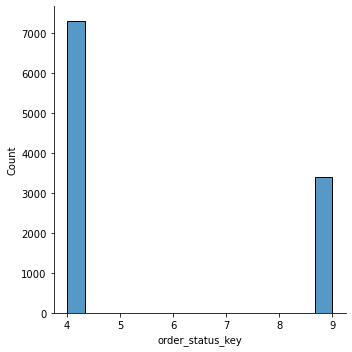

In [64]:
sns.displot(data["order_status_key"])

In [67]:
# check the distribution of the orders
data.groupby(by=["is_driver_assigned_key","order_status_key"])["order_gk"].count()

is_driver_assigned_key  order_status_key
0                       4                   4496
                        9                   3406
1                       4                   2811
                        9                      3
Name: order_gk, dtype: int64

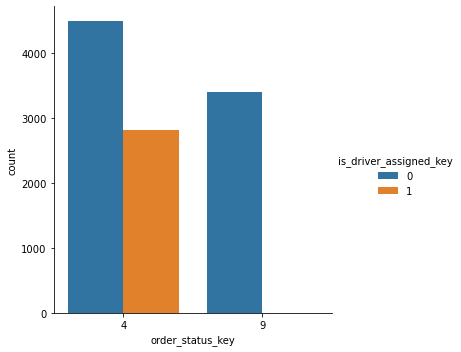

In [71]:
sns.catplot(data=data, x="order_status_key", hue="is_driver_assigned_key", kind="count")

### 2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?



In [86]:
from itertools import groupby

failed_orders = data.groupby(by="order_datetime")["order_gk"].count()
failed_orders


order_datetime
00:00:02    1
00:00:03    1
00:00:05    1
00:00:11    1
00:00:16    1
           ..
23:59:34    1
23:59:40    1
23:59:42    1
23:59:47    1
23:59:59    1
Name: order_gk, Length: 9921, dtype: int64

In [88]:
# extract hour from the time column
data["order_hour"] = data["order_datetime"].str.split(":").apply(lambda split: split[0])

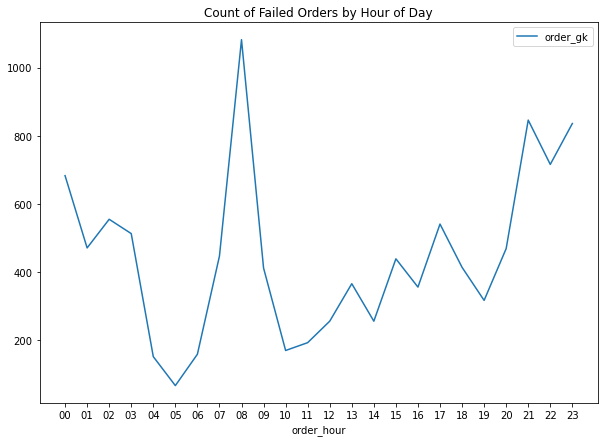

In [95]:
_ = data.groupby(by="order_hour")["order_gk"].count().plot(figsize=(10, 7),
                                                         legend=True,
                                                         xticks=range(0, 24),
                                                         title="Count of Failed Orders by Hour of Day")

In [97]:
grouped_q3 = data.groupby(by=["order_hour", "is_driver_assigned_key"])["cancellations_time_in_seconds"].mean()
grouped_q3

order_hour  is_driver_assigned_key
00          0                         111.557047
            1                         293.616667
01          0                          98.132420
            1                         247.715909
02          0                         106.438819
            1                         303.307692
03          0                         104.361607
            1                         292.640625
04          0                          90.000000
            1                         243.219512
05          0                         121.800000
            1                         314.400000
06          0                         124.955224
            1                         272.553191
07          0                         112.628049
            1                         188.891026
08          0                         120.702179
            1                         189.025478
09          0                         120.000000
            1                     

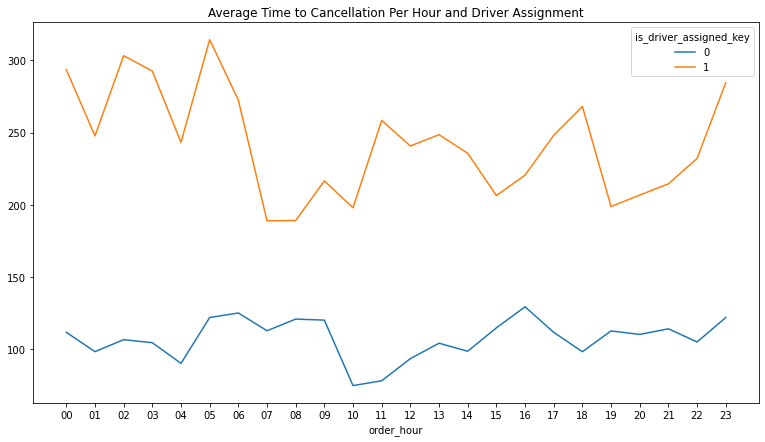

In [98]:
_ = grouped_q3.reset_index().pivot(index="order_hour",
                                   columns="is_driver_assigned_key",
                                   values="cancellations_time_in_seconds").plot(xticks=range(0, 24),
                                                                                figsize=(13, 7),
                                                                                title="Average Time to Cancellation Per Hour and Driver Assignment")